In [6]:
import torch
import torch.nn as nn
import numpy as np

import torch.nn.functional as F
import matplotlib.pyplot as plt

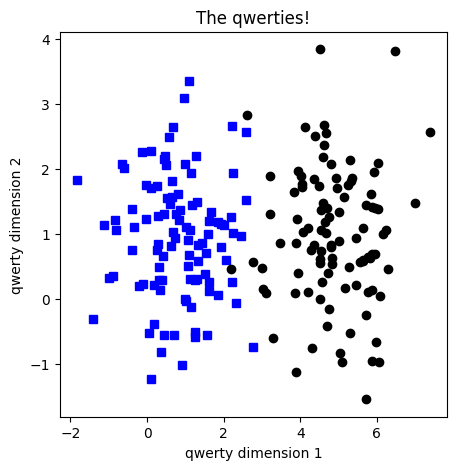

In [7]:
# create data
nPerClust = 100
blur = 1

A = [  1, 1 ]
B = [  5, 1 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [8]:
class ann(nn.Module):
    def __init__(self):
        super().__init__()
        # input layer
        self.input = nn.Linear(2,1)
        # output layer
        self.output = nn.Linear(1,1)
    def forward(self, x):
        # apply relu
        x = F.relu(self.input(x))
        # output layer
        x = self.output(x)
        x = torch.sigmoid(x)
        return x

In [9]:
model = ann()

In [13]:
from torchsummary import summary
summary(model, (20,2))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 20, 1]               3
            Linear-2                [-1, 20, 1]               2
Total params: 5
Trainable params: 5
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


# Code challenge

In [17]:
class multilayer(nn.Module):
    def __init__(self):
        super().__init__()
        self.input = nn.Linear(2,16)
        self.hidden = nn.Linear(16,1)
        self.output = nn.Linear(1,1)
    def forward(self, x):
        x = self.input(x)
        x = F.relu(x)
        x = self.hidden(x)
        x = F.relu(x)
        x = self.output(x)
        x = torch.sigmoid(x)
        return x


In [18]:
multilayer_model = multilayer()

In [19]:
summary(multilayer_model, (20,2))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 20, 16]              48
            Linear-2                [-1, 20, 1]              17
            Linear-3                [-1, 20, 1]               2
Total params: 67
Trainable params: 67
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------
